[View in Colaboratory](https://colab.research.google.com/github/dinukasaminda/opencv-python-findFaces/blob/master/Medium_FindFacesExample.ipynb)

In [2]:
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import urllib2
import numpy as np

xmldata = urllib2.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml').read()
file = open('haarcascade_frontalface.xml','w')
file.write(xmldata)
file.close()

    100% |████████████████████████████████| 15.5MB 79kB/s 
Get:1 http://ftp.us.debian.org/debian testing InRelease [136 kB]
Get:2 http://security.ubuntu.com/ubuntu xenial-security InRelease [102 kB]
Get:3 http://archive.ubuntu.com/ubuntu xenial InRelease [247 kB]
Get:4 http://ftp.us.debian.org/debian testing/main Sources [9,335 kB]
Get:5 http://security.ubuntu.com/ubuntu xenial-security/universe Sources [51.1 kB]
Get:6 http://security.ubuntu.com/ubuntu xenial-security/main amd64 Packages [485 kB]
Get:7 http://security.ubuntu.com/ubuntu xenial-security/restricted amd64 Packages [12.9 kB]
Get:8 http://security.ubuntu.com/ubuntu xenial-security/universe amd64 Packages [223 kB]
Get:9 http://security.ubuntu.com/ubuntu xenial-security/multiverse amd64 Packages [3,485 B]
Get:10 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [102 kB]
Get:11 http://archive.ubuntu.com/ubuntu xenial-backports InRelease [102 kB]
Get:12 http://archive.ubuntu.com/ubuntu xenial/universe Sources [9,802 kB]


Need to get 107 kB of archives.
After this operation, 641 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu xenial/main amd64 libxext6 amd64 2:1.3.3-1 [29.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu xenial/main amd64 x11-common all 1:7.7+13ubuntu3 [22.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu xenial/main amd64 libice6 amd64 2:1.0.9-1 [39.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu xenial/main amd64 libsm6 amd64 2:1.2.2-1 [15.8 kB]
Fetched 107 kB in 0s (151 kB/s)
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package libxext6:amd64.
dpkg: warning: files list file for package 'libquadmath0:amd64' missing; assuming package has no files currently installed
dpkg: warning: files list file for package 'libfontconfig1-dev:amd64' missing; assuming package has no files currently installed
dpkg: warning: files list file for package 'liblapack-dev' missing; assuming package has no files currently in

Setting up libxext6:amd64 (2:1.3.3-1) ...
7Progress: [ 61%] [####################################......................] 87Progress: [ 66%] [#######################################...................] 8Setting up x11-common (1:7.7+13ubuntu3) ...
7Progress: [ 71%] [##########################################................] 8debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76.)
debconf: falling back to frontend: Readline
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
7Progress: [ 76%] [#############################################.............] 8Setting up libice6:amd64 (2:1.0.9-1) ...
7Progress: [ 80%] [###############################################...........] 87Progress: [ 85%] 

In [0]:
def findfaces(fullurltoimage):
  f = urllib2.urlopen(fullurltoimage)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface.xml')
  image = np.asarray(bytearray(f.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(
      gray,
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(30, 30),
      flags = cv2.CASCADE_SCALE_IMAGE
  )
  print "------> Found {0} faces! <------ ".format(len(faces))

  for (x, y, w, h) in faces:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 5)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image,extent=[300,500,0,1],aspect='auto')
  plt.grid(False)
  plt.axis('off')
  plt.show()

------> Found 4 faces! <------ 


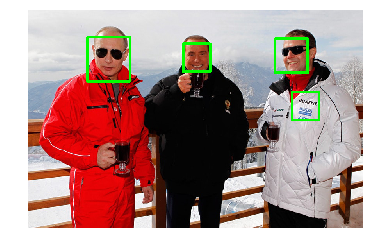

In [97]:
findfaces('http://i.telegraph.co.uk/multimedia/archive/03385/putin-berlusconi-s_3385218k.jpg')

------> Found 3 faces! <------ 


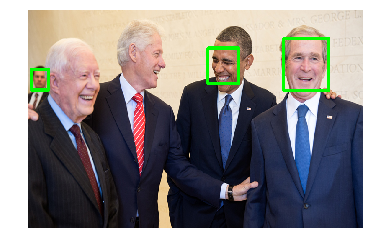

In [98]:
findfaces('https://obamawhitehouse.archives.gov/sites/whitehouse.gov/files/images/1600/Presidents/Four_Presidents.jpg')

------> Found 15 faces! <------ 


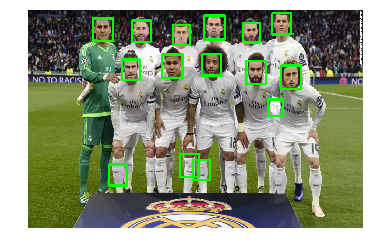

In [99]:
findfaces('http://cdn.cnn.com/cnnnext/dam/assets/160412203255-real-madrid-team-super-169.jpg')

------> Found 10 faces! <------ 


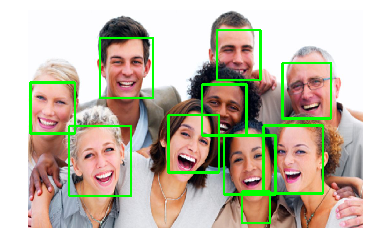

In [100]:
findfaces('http://epilepsyu.com/wp-content/uploads/2014/01/happy-people-1050x600.jpg')

------> Found 1 faces! <------ 


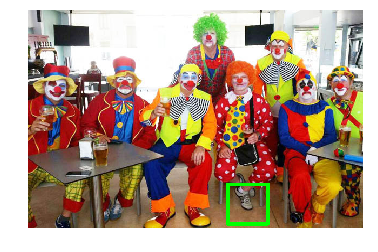

In [101]:
findfaces('https://cdn.images.dailystar.co.uk/dynamic/1/photos/671000/620x/clowns-555886.jpg')

------> Found 5 faces! <------ 


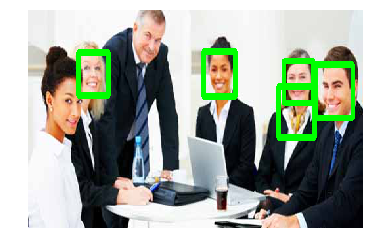

In [102]:
findfaces('http://www.brefigroup.co.uk/images/new/development_and_training_510.jpg')

------> Found 8 faces! <------ 


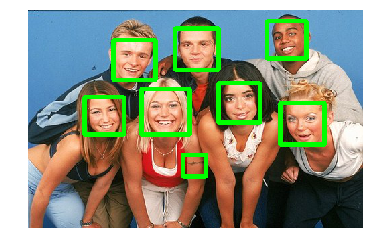

In [4]:
findfaces('https://pbs.twimg.com/profile_images/1599701422/rm.jpg')